In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_Tiergarten_multi_class

In [2]:
numNodes = Compute_Jacobian_Tiergarten_multi_class.numNodes;
numLinks = Compute_Jacobian_Tiergarten_multi_class.numLinks;
numODpairs = Compute_Jacobian_Tiergarten_multi_class.numODpairs;
numZones = Compute_Jacobian_Tiergarten_multi_class.numZones;
od_pairs = Compute_Jacobian_Tiergarten_multi_class.od_pairs;
link_list_js = Compute_Jacobian_Tiergarten_multi_class.link_list_js;
link_length_list = Compute_Jacobian_Tiergarten_multi_class.link_length_list;

In [3]:
include("../Julia_files/initia_data.jl");
include("prepare_data_Tiergarten.jl");
include("extract_data_Tiergarten.jl");
include("../Julia_files/tap_MSA_multi_class.jl");
include("../Julia_files/inverseVI_multi_class.jl");
include("../Julia_files/demands_adjustment_gradi_multi_class.jl");

In [4]:
demandsDictCar[0] = demandsDict[0]["car"];
demandsDictCar[1] = demandsDict[1]["car"];
demandsDictTruck[0] = demandsDict[0]["truck"];
demandsDictTruck[1] = demandsDict[1]["truck"];

In [5]:
demandsDiffDictCar[1] = norm(demandsDicToVec(demandsDictCar[1]) - demandsDicToVec(demandsDictCar[0]))/
norm(demandsDicToVec(demandsDictCar[0]));

demandsDiffDictTruck[1] = norm(demandsDicToVec(demandsDictTruck[1]) - demandsDicToVec(demandsDictTruck[0]))/
norm(demandsDicToVec(demandsDictTruck[0]));

In [6]:
demandsVecDictCar[0] = demandsDicToVec(demandsDictCar[0]);
demandsVecDictTruck[0] = demandsDicToVec(demandsDictTruck[0]);

In [7]:
demandsVecDictCar

Dict{Any,Any} with 1 entry:
  0 => [18.072,14.656,17.456,12.176,2.984,0.08,0.248,0.976,0.416,0.168  …  5.99…

In [8]:
demandsVecDictTruck

Dict{Any,Any} with 1 entry:
  0 => [4.518,3.664,4.364,3.044,0.746,0.02,0.062,0.244,0.104,0.042  …  1.498,2.…

In [9]:
fcoeffs = [1, 0, 0, 0, 1];

# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA_Multi(demandsDictCar[0], demandsDictTruck[0], fcoeffs);

In [10]:
tapFlowDicDict[0]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((248,65),395.656),Pair{Any,Any}((137,1…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((248,65),98.914),Pair{Any,Any}((137,10…

In [11]:
tapFlowVecDict[0]

2×766 Array{Float64,2}:
 32.9041  118.439   612.298  0.0  547.093   …  3.17326   29.9437   58.9791
  8.224    29.6097  152.431  0.0   97.4636     0.793226   7.48221  14.7385

In [12]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/Tiergarten_net.txt", tapFlowDicDict[0]);

In [13]:
arcsDict[0]

Dict{Any,Any} with 766 entries:
  (248,65)  => Arc(248,65,900.0,17.0,593.484,395.656,98.914)
  (137,106) => Arc(137,106,2800.0,1.66667,268.764,179.176,44.794)
  (267,256) => Arc(267,256,2400.0,7.33333,104.42,69.6041,17.4079)
  (354,353) => Arc(354,353,900.0,1.0,344.967,229.883,57.5423)
  (56,55)   => Arc(56,55,600.0,0.333333,0.0,0.0,0.0)
  (259,255) => Arc(259,255,2400.0,0.666667,0.0,0.0,0.0)
  (125,177) => Arc(125,177,900.0,1.66667,0.0,0.0,0.0)
  (36,35)   => Arc(36,35,2800.0,0.333333,23.5704,15.7155,3.92747)
  (183,184) => Arc(183,184,900.0,0.333333,0.0,0.0,0.0)
  (43,361)  => Arc(43,361,2800.0,12.6667,7.81583,5.21975,1.29804)
  (16,277)  => Arc(16,277,999999.0,0.0,1833.91,1221.37,306.267)
  (298,307) => Arc(298,307,2400.0,1.0,1799.71,1200.47,299.619)
  (31,34)   => Arc(31,34,2800.0,0.666667,130.308,86.8762,21.7158)
  (187,191) => Arc(187,191,600.0,0.666667,274.182,182.788,45.6969)
  (241,244) => Arc(241,244,2400.0,0.333333,0.0,0.0,0.0)
  (84,95)   => Arc(84,95,900.0,2.33333,0.0,0.0,

In [14]:
deg = 7
c = 1.5
lam = 0.1

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDictCar[1], demandsDictTruck[1], 
arcsDict[0]);

In [15]:
# weight parameters
gamma1 = 10 ^ 4
gamma2 = 1

1

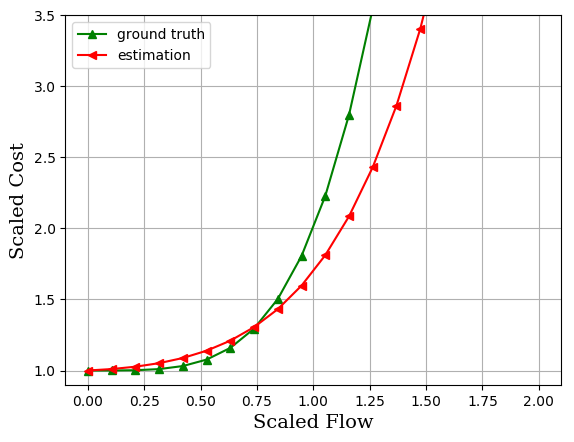

In [16]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class_$(gamma1)_$(gamma2).pdf")

In [17]:
demandsVecDictCar[1] = demandsDicToVec(demandsDictCar[1]);
demandsVecDictTruck[1] = demandsDicToVec(demandsDictTruck[1]);

objFunDict[1] = objF(gamma1, gamma2, demandsVecDictCar[1], demandsVecDictCar[0], demandsVecDictTruck[1], 
    demandsVecDictTruck[0], coeffs_dict[(deg, c, lam, 1)]);

In [18]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA_Multi(demandsDictCar[1], demandsDictTruck[1], 
coeffs_dict[(deg, c, lam, 1)]);

In [19]:
tapFlowDicDict[1]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((248,65),410.026),Pair{Any,Any}((137,1…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((248,65),102.506),Pair{Any,Any}((137,1…

In [20]:
tapFlowVecDict[1] 

2×766 Array{Float64,2}:
 32.1027   117.603   600.385  0.0  487.388   …  3.10928   30.1084   58.7823
  8.02566   29.4453  145.237  0.0   90.7429     0.776946   7.52147  14.6975

In [21]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/Tiergarten_net.txt", tapFlowDicDict[1]);

In [22]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [23]:
linkCostDicDict[1]["car"]

Dict{Any,Any} with 766 entries:
  "1"   => 0.0
  "519" => 5.0
  "599" => 0.0
  "491" => 5.33333
  "228" => 6.0
  "332" => 15.3155
  "190" => 7.33333
  "227" => 0.0
  "297" => 1.66667
  "605" => 35.6667
  "24"  => 0.0
  "204" => 15.7672
  "416" => 8.33333
  "23"  => 0.0
  "160" => 2.02874
  "561" => 0.333333
  "253" => 4.76916
  "39"  => 0.0
  "112" => 0.669255
  "372" => 10.1322
  "34"  => 0.0
  "137" => 0.333333
  "590" => 26.6667
  "55"  => 0.0
  "323" => 1.0
  ⋮     => ⋮

In [24]:
linkCostDicDict[1]["truck"]

Dict{Any,Any} with 766 entries:
  "1"   => 0.0
  "519" => 5.5
  "599" => 0.0
  "491" => 5.86667
  "228" => 6.6
  "332" => 16.847
  "190" => 8.06667
  "227" => 0.0
  "297" => 1.83333
  "605" => 39.2333
  "24"  => 0.0
  "204" => 17.3439
  "416" => 9.16667
  "23"  => 0.0
  "160" => 2.23161
  "561" => 0.366666
  "253" => 5.24607
  "39"  => 0.0
  "112" => 0.73618
  "372" => 11.1454
  "34"  => 0.0
  "137" => 0.366666
  "590" => 29.3333
  "55"  => 0.0
  "323" => 1.1
  ⋮     => ⋮

In [25]:
link_length_list

766-element Array{Any,1}:
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   ⋮  
  15.0
 428.0
   0.0
 137.0
 300.0
  18.0
  81.0
  41.0
  27.0
 327.0
 363.0
  70.0

In [26]:
link_length_list_car = [linkCostDicDict[1]["car"]["$(i)"] for i=0:numLinks-1]
link_length_list_truck = [linkCostDicDict[1]["truck"]["$(i)"] for i=0:numLinks-1]

link_length_list_dict[0] = link_length_list_car
link_length_list_dict[1] = link_length_list_truck

link_length_list_dict_dict[1] = link_length_list_dict

Dict{Any,Any} with 2 entries:
  0 => [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,3.66667,13.6681,0.33333…
  1 => [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,4.03333,15.0349,0.36666…

In [27]:
jacobiSpiessDict[1] = Compute_Jacobian_Tiergarten_multi_class.jacobianSpiess(numNodes, numLinks, 
    numODpairs, od_pairs, link_list_js, link_length_list_dict_dict[1]);

In [28]:
jacobiSpiessDict[1]

650×766×2 Array{Float64,3}:
[:, :, 1] =
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0

In [29]:
# maximum number of iterations
N = 100;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-8;

In [ ]:
for l = 1:N
    
    jacobDict[l] = jacobiSpiessDict[l]

    demandsVecDictCar[l] = demandsDicToVec(demandsDictCar[l]);
    demandsVecDictTruck[l] = demandsDicToVec(demandsDictTruck[l]);

    descDirecDict[l] = descDirec(gamma1, gamma2, demandsVecDictCar[l], demandsVecDictCar[0],
        demandsVecDictTruck[l], demandsVecDictTruck[0], 
        tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);
    
    searchDirecDict[l] = searchDirec(demandsVecDictCar[l], demandsVecDictTruck[l], descDirecDict[l], epsilon_1);
    
    thetaMaxDict[l] = thetaMax(demandsVecDictCar[l], demandsVecDictTruck[l], searchDirecDict[l]);
    
    demandsVecDictCar[l+1] = similar(demandsVecDictCar[0]);
    demandsVecDictTruck[l+1] = similar(demandsVecDictTruck[0]);
    
    demandsVecDictCar[l+1], demandsVecDictTruck[l+1], objFunDict[l+1] = armijo(gamma1, gamma2, objFunDict[l], 
        demandsVecDictCar[l], demandsVecDictTruck[l], demandsVecDictCar[0], demandsVecDictTruck[0],
        coeffs_dict[(deg, c, lam, l)], searchDirecDict[l], thetaMaxDict[l], rho, M);
    
    demandsDictCar[l+1] = demandsVecToDic(demandsVecDictCar[l+1]);
    demandsDictTruck[l+1] = demandsVecToDic(demandsVecDictTruck[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA_Multi(demandsDictCar[l+1], demandsDictTruck[l+1], 
    coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/Tiergarten_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDictCar[l+1], 
    demandsDictTruck[l+1], arcsDict[0]);
        
    objFunTmp = objF(gamma1, gamma2, demandsVecDictCar[l+1], demandsVecDictCar[0], 
        demandsVecDictTruck[l+1], demandsVecDictTruck[0], coeffs_dict[(deg, c, lam, l+1)])
    
    if objFunTmp > objFunDict[l+1]
        coeffs_dict[(deg, c, lam, l+1)] = coeffs_dict[(deg, c, lam, l)]
    end
    
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
        
    #######################################
    link_length_list_dict[0] = [linkCostDicDict[l+1]["car"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict[1] = [linkCostDicDict[l+1]["truck"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict_dict[l+1] = link_length_list_dict
    #######################################
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_Tiergarten_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, 
    od_pairs, link_list_js, link_length_list_dict_dict[l+1]);
        
    demandsDiffDictCar[l+1] = norm(demandsVecDictCar[l+1] - demandsVecDictCar[0]) / norm(demandsVecDictCar[0]);
    demandsDiffDictTruck[l+1] = norm(demandsVecDictTruck[l+1] - demandsVecDictTruck[0]) / 
    norm(demandsVecDictTruck[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
        
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [31]:
demandsVecDictCar

Dict{Any,Any} with 5 entries:
  0 => [18.072,14.656,17.456,12.176,2.984,0.08,0.248,0.976,0.416,0.168  …  5.99…
  4 => [2.32703e-315,3.78454e-321,2.75224e-318,3.78454e-321,3.78454e-321,0.0,0.…
  2 => [16.996,14.5822,18.0467,11.6433,3.10377,0.0754825,0.256019,1.0113,0.3953…
  3 => [17.8088,14.6402,17.6021,12.0482,3.01841,0.0816064,0.250804,0.985313,0.4…
  1 => [16.7082,14.5624,18.2035,11.5016,3.13454,0.0740047,0.259109,1.0219,0.391…

In [32]:
demandsVecDictTruck

Dict{Any,Any} with 5 entries:
  0 => [4.518,3.664,4.364,3.044,0.746,0.02,0.062,0.244,0.104,0.042  …  1.498,2.…
  4 => [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,94.3468,9.7…
  2 => [4.24748,3.64605,4.51194,2.91135,0.776457,0.0193449,0.0645305,0.253351,0…
  3 => [4.45373,3.66189,4.40155,3.01392,0.756453,0.0221686,0.0641875,0.247502,0…
  1 => [4.17706,3.6406,4.55088,2.87539,0.783635,0.0185012,0.0647773,0.255474,0.…

In [33]:
norObjFunDict

Dict{Any,Any} with 0 entries

In [34]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_Tiergarten_$(gamma1)_$(gamma2).pdf")

LoadError: LoadError: ArgumentError: reducing over an empty collection is not allowed
while loading In[34], in expression starting on line 16

In [35]:
using PyPlot

iterNum = 1:(length(demandsDiffDictCar))

demandsDiff = map(iterNum->demandsDiffDictCar[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictCar) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Tiergarten_car_$(gamma1)_$(gamma2).pdf")

LoadError: LoadError: InterruptException:
while loading In[35], in expression starting on line 9

In [36]:
using PyPlot

iterNum = 1:(length(demandsDiffDictTruck))

demandsDiff = map(iterNum->demandsDiffDictTruck[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictTruck) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Tiergarten_truck_$(gamma1)_$(gamma2).pdf")

LoadError: LoadError: InterruptException:
while loading In[36], in expression starting on line 9

In [37]:
using PyPlot

iterNum = 1:(length(objInvVIDict))

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "p-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, length(objInvVIDict) + 1 + .2)
# ylim(0.9, 2.0)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("./results/objFun_invVI_Tiergarten_$(gamma1)_$(gamma2).pdf")

InterruptException: InterruptException:

In [38]:
coeffs_dict

InterruptException: InterruptException:

In [39]:
using PyPlot

iterN = 2

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class_$(gamma1)_$(gamma2).pdf")

LoadError: LoadError: InterruptException:
while loading In[39], in expression starting on line 13

In [40]:
using PyPlot

iterN = 3

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class_$(gamma1)_$(gamma2).pdf")

LoadError: LoadError: InterruptException:
while loading In[40], in expression starting on line 28

In [41]:
using PyPlot

iterN = length(coeffs_dict)

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class_$(gamma1)_$(gamma2).pdf")

LoadError: LoadError: InterruptException:
while loading In[41], in expression starting on line 15

In [42]:
outfile = open("./results/norObjFunDict_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [43]:
outfile = open("./results/demandsDiffDictCar_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, demandsDiffDictCar)

close(outfile)

In [44]:
outfile = open("./results/demandsDiffDictTruck_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, demandsDiffDictTruck)

close(outfile)

In [45]:
outfile = open("./results/objInvVIDict_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [46]:
outfile = open("./results/coeffs_dict_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

LoadError: LoadError: InterruptException:
while loading In[46], in expression starting on line 3

In [47]:
outfile = open("./results/demandsVecDictCar_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, demandsVecDictCar)

close(outfile)

In [48]:
outfile = open("./results/demandsVecDictTruck_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, demandsVecDictTruck)

close(outfile)

In [49]:
outfile = open("./results/demandsDictCar_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, demandsDictCar)

close(outfile)

In [50]:
outfile = open("./results/demandsDictTruck_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, demandsDictTruck)

close(outfile)

In [51]:
outfile = open("./results/tapFlowDicDict_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [52]:
outfile = open("./results/tapFlowVecDict_$(gamma1)_$(gamma2).json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)